In [222]:
import jax
from jax import numpy as jnp
from jax import random

def f(theta, X, y):
    n, m = X.shape
    return 1/(2*n)*jnp.linalg.norm(X@theta - y)**2

X = [
    [1, 2],
    [2, 3],
    [3, 4]
]

key = random.PRNGKey(0)

X = random.normal(key, (228, 10))
theta_star = random.normal(key, (10,))
theta_0 = jnp.zeros_like(theta_star)
sigma = 0
y = X @ theta_star + sigma*random.normal(key, (228,))

# y = [2, 3, 4]

X, y = jnp.array(X).astype(jnp.float32), jnp.array(y).astype(jnp.float32)

In [228]:
def f_grad(theta, X, y):
    n, m = X.shape
    return 1/n* X.T @ (X@theta - y)

alpha = 1e-2
theta = theta_0
theta_res_sgd = []
theta_res_sgd.append(jnp.linalg.norm(theta - theta_star))
for i_iter in range(1000):
    i = i_iter % 3
    g = f_grad(theta, jnp.atleast_2d(X[i, :]), y[i])
    theta = theta - alpha*g
    theta_res_sgd.append(jnp.abs(f(theta, jnp.atleast_2d(X[i, :]), y[i]) - f(theta_star, X, y)))
    theta_res_sgd.append(jnp.linalg.norm(theta - theta_star))
    print(jnp.linalg.norm(g))

3.221886
3.033488
4.715717
2.7923844
2.6542997
3.720974
2.4340372
2.3373237
2.8991072
2.13475
2.0719986
2.2205927
1.88449
1.8495632
1.6609374
1.6749337
1.6627479
1.1998279
1.4991766
1.5055221
0.8204103
1.3514895
1.3728818
0.5087067
1.2271198
1.2606763
0.253122
1.1221244
1.1654607
0.044038266
1.0332317
1.0843768
0.12652059
0.95772755
1.0150533
0.26517206
0.8933598
0.95552194
0.3774046
0.83825916
0.9041493
0.46776846
0.7908752
0.8595801
0.54004127
0.74992174
0.8206893
0.5973502
0.7143296
0.78654283
0.6422944
0.6832133
0.75636506
0.67702544
0.65583664
0.72951317
0.7033283
0.6315889
0.7054514
0.7226846
0.6099636
0.6837361
0.7363191
0.5905377
0.663998
0.7452508
0.5729634
0.6459311
0.7503224
0.55694985
0.62928
0.7522322
0.54225445
0.6138325
0.75155956
0.52867794
0.59941286
0.7487827
0.51605266
0.5858735
0.7442997
0.5042395
0.5730925
0.7384402
0.49312365
0.5609683
0.7314734
0.4826084
0.5494152
0.7236275
0.47261345
0.53836185
0.7150866
0.46307218
0.5277496
0.70600605
0.45392883
0.5175288
0.696

In [224]:
hess = 1/228 * X.T @ X
mu, L = min(jnp.linalg.eigvals(hess).astype(jnp.float32)), \
        max(jnp.linalg.eigvals(hess).astype(jnp.float32))

print(f"🐶 mu {mu:.2f}; L {L:.2f}")

🐶 mu 0.71; L 1.37


/opt/homebrew/lib/python3.11/site-packages/jax/_src/lax/lax.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return _convert_element_type(operand, new_dtype, weak_type=False)


In [229]:
alpha = 1e-2
theta = theta_0
theta_res = []
theta_res.append(jnp.linalg.norm(theta - theta_star))
for i_iter in range(1000):
    i = i_iter % 3
    theta = theta - alpha*f_grad(theta, jnp.atleast_2d(X), y)
    theta_res.append(jnp.linalg.norm(theta - theta_star))

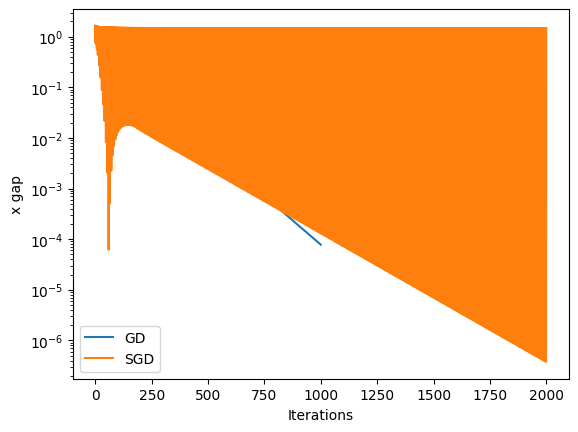

In [232]:
from matplotlib import pyplot as plt
plt.semilogy(theta_res, label="GD")
plt.semilogy(theta_res_sgd, label="SGD")
plt.xlabel("Iterations")
plt.ylabel("x gap")
plt.legend()
plt.show()

In [218]:
theta_res_sgd

[Array(1.630508, dtype=float32),
 Array(-0.19320041, dtype=float32),
 Array(0.03250998, dtype=float32),
 Array(-0.283787, dtype=float32),
 Array(-0.261176, dtype=float32),
 Array(-0.06411064, dtype=float32),
 Array(-0.366379, dtype=float32),
 Array(-0.31048536, dtype=float32),
 Array(-0.13782632, dtype=float32),
 Array(-0.4168511, dtype=float32),
 Array(-0.34652483, dtype=float32),
 Array(-0.19460294, dtype=float32),
 Array(-0.44646215, dtype=float32),
 Array(-0.37308007, dtype=float32),
 Array(-0.2387604, dtype=float32),
 Array(-0.46272874, dtype=float32),
 Array(-0.3928167, dtype=float32),
 Array(-0.2734453, dtype=float32),
 Array(-0.47063476, dtype=float32),
 Array(-0.40761915, dtype=float32),
 Array(-0.3009645, dtype=float32),
 Array(-0.47345614, dtype=float32),
 Array(-0.41882607, dtype=float32),
 Array(-0.32302016, dtype=float32),
 Array(-0.47332186, dtype=float32),
 Array(-0.42739335, dtype=float32),
 Array(-0.34087706, dtype=float32),
 Array(-0.47159478, dtype=float32),
 Array(

In [168]:
theta_res_sgd[-100:]

[Array(nan, dtype=float32),
 Array(nan, dtype=float32),
 Array(nan, dtype=float32),
 Array(nan, dtype=float32),
 Array(nan, dtype=float32),
 Array(nan, dtype=float32),
 Array(nan, dtype=float32),
 Array(nan, dtype=float32),
 Array(nan, dtype=float32),
 Array(nan, dtype=float32),
 Array(nan, dtype=float32),
 Array(nan, dtype=float32),
 Array(nan, dtype=float32),
 Array(nan, dtype=float32),
 Array(nan, dtype=float32),
 Array(nan, dtype=float32),
 Array(nan, dtype=float32),
 Array(nan, dtype=float32),
 Array(nan, dtype=float32),
 Array(nan, dtype=float32),
 Array(nan, dtype=float32),
 Array(nan, dtype=float32),
 Array(nan, dtype=float32),
 Array(nan, dtype=float32),
 Array(nan, dtype=float32),
 Array(nan, dtype=float32),
 Array(nan, dtype=float32),
 Array(nan, dtype=float32),
 Array(nan, dtype=float32),
 Array(nan, dtype=float32),
 Array(nan, dtype=float32),
 Array(nan, dtype=float32),
 Array(nan, dtype=float32),
 Array(nan, dtype=float32),
 Array(nan, dtype=float32),
 Array(nan, dtype=fl

In [136]:
jnp.atleast_2d(X[0, :]).shape

(1, 2)